In [933]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [934]:
import warnings
# Ignore all DeprecationWarnings globally
warnings.filterwarnings('ignore')

In [935]:
df = pd.read_csv("bank_marketing_dataset.csv")
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [936]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [937]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')

In [938]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score', 'converted'],
      dtype='object')

In [939]:
for cat_col in categorical_cols:
    if df[cat_col].isnull().any():
        df[cat_col].fillna('NA', inplace = True)

In [940]:
for num_col in numerical_cols:
    if df[num_col].isnull().any():
        df[num_col].fillna(0, inplace = True)

In [941]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [942]:
df.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,52472.172367,2.976744,0.506108,0.619015
std,1.449717,24254.347030,1.681564,0.288465,0.485795
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,44097.250000,2.000000,0.262500,0.000000
50%,2.000000,57449.500000,3.000000,0.510000,1.000000
75%,3.000000,68241.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [943]:
from sklearn.model_selection import train_test_split

In [944]:
encoder = LabelEncoder()

In [945]:
# Option 1: Remove inplace=True and assign the result
df['converted'] = encoder.fit_transform(df['converted'])

# OR Option 2: Do the assignment and fillna in two steps
# df['converted'] = df['converted'].map({'yes': 1, 'no': 0})
# df['converted'].fillna(0, inplace=True)

In [946]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [947]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [948]:
len(df_full_train), len(df_test)

(1169, 293)

In [ ]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [950]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [951]:
df_train = df_train.reset_index(drop = True)

In [952]:
from sklearn.metrics import roc_auc_score

In [953]:
# 2. Define features and target
numerical_cols = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
target_cols = 'converted'
y_train = df_train[target_cols].values.ravel() # Converts to a 1D numpy array
y_val = df_val[target_cols].values.ravel()

auc_results = {}

In [954]:
# 3 & 4. Calculate AUC for each numerical feature and invert if AUC < 0.5
for col in numerical_cols:
    # Use the feature as the prediction score
    y_pred = df_train[col]

    # Calculate initial AUC
    initial_auc = roc_auc_score(y_train, y_pred)
    current_auc = initial_auc

    # Check for inversion
    if initial_auc < 0.5:
        # Invert the variable by negating it
        y_pred_inverted = -df_train[col]
        current_auc = roc_auc_score(y_train, y_pred_inverted)
        print(f"Feature: {col}, Initial AUC: {initial_auc:.4f} (Inverted), Final AUC: {current_auc:.4f}")
    else:
        print(f"Feature: {col}, Initial AUC: {initial_auc:.4f} (Not Inverted), Final AUC: {current_auc:.4f}")

    # Store the final AUC
    auc_results[col] = current_auc

Feature: number_of_courses_viewed, Initial AUC: 0.7636 (Not Inverted), Final AUC: 0.7636
Feature: annual_income, Initial AUC: 0.5520 (Not Inverted), Final AUC: 0.5520
Feature: interaction_count, Initial AUC: 0.7383 (Not Inverted), Final AUC: 0.7383
Feature: lead_score, Initial AUC: 0.6145 (Not Inverted), Final AUC: 0.6145


In [955]:
# 5. Find the feature with the highest AUC
highest_auc_feature = max(auc_results, key=auc_results.get)
highest_auc_value = auc_results[highest_auc_feature]

print(f"\nAUC Results: {auc_results}")
print(f"The numerical variable with the highest AUC is '{highest_auc_feature}' with an AUC of {highest_auc_value:.4f}")


AUC Results: {'number_of_courses_viewed': np.float64(0.7635680590007088), 'annual_income': np.float64(0.5519578313253012), 'interaction_count': np.float64(0.738270176293409), 'lead_score': np.float64(0.6144993577250176)}
The numerical variable with the highest AUC is 'number_of_courses_viewed' with an AUC of 0.7636


# One hot Encoding

In [956]:
from sklearn.feature_extraction import DictVectorizer

In [957]:
categorical_cols = ['lead_source', 'industry', 'employment_status', 'location']
numerical_cols = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [958]:
dv = DictVectorizer(sparse = False)

In [959]:
train_dicts = df_train[categorical_cols + numerical_cols].to_dict(orient = 'records')
val_dicts = df_val[categorical_cols + numerical_cols].to_dict(orient = 'records')

# Inputing into the Logistic Regression Model

In [960]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [962]:
X_val = dv.transform(val_dicts)

In [963]:
X_val

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.8777e+04, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        2.0000e+00],
       [7.8148e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       ...,
       [9.2215e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+00],
       [5.3087e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [6.0375e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00]], shape=(293, 31))

In [964]:
X_train

array([[9.5543e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [5.4924e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [7.7352e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       ...,
       [7.3702e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.3341e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], shape=(876, 31))

In [965]:
# Model definition
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [966]:
# Split the data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [967]:
# Assuming X_train is a Pandas DataFrame

# 1. Apply One-Hot Encoding to convert all string/categorical columns into numerical columns
# X_train = pd.get_dummies(X_train)
# X_val = pd.get_dummies(X_val)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [968]:
# Predict and evaluate
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {round(accuracy, 3)}")

Validation Accuracy: 0.7


In [969]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [970]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[ 41,  81],
       [  7, 164]])

In [971]:
y_pred_proba = model.predict_proba(X_val)[:,1]
accuracy_score(y_val, (y_pred_proba >= 0.5).astype(int))

0.6996587030716723

In [972]:
thresholds = np.arange(0.0, 1.01, 0.01)
scores = []

y_pred_proba = model.predict_proba(X_val)[:,1]
for t in thresholds:
    score = accuracy_score(y_val, (y_pred_proba >= t).astype(int))
    print('%.2f %.3f' % (t, score)) 
    scores.append(score)

0.00 0.584
0.01 0.584
0.02 0.584
0.03 0.584
0.04 0.584
0.05 0.584
0.06 0.584
0.07 0.584
0.08 0.584
0.09 0.584
0.10 0.584
0.11 0.584
0.12 0.584
0.13 0.584
0.14 0.584
0.15 0.584
0.16 0.584
0.17 0.584
0.18 0.584
0.19 0.584
0.20 0.584
0.21 0.584
0.22 0.584
0.23 0.584
0.24 0.584
0.25 0.584
0.26 0.584
0.27 0.587
0.28 0.590
0.29 0.594
0.30 0.594
0.31 0.594
0.32 0.597
0.33 0.597
0.34 0.601
0.35 0.601
0.36 0.608
0.37 0.608
0.38 0.614
0.39 0.628
0.40 0.642
0.41 0.642
0.42 0.659
0.43 0.662
0.44 0.676
0.45 0.679
0.46 0.686
0.47 0.689
0.48 0.700
0.49 0.696
0.50 0.700
0.51 0.706
0.52 0.717
0.53 0.730
0.54 0.737
0.55 0.747
0.56 0.747
0.57 0.754
0.58 0.751
0.59 0.754
0.60 0.747
0.61 0.751
0.62 0.751
0.63 0.744
0.64 0.744
0.65 0.734
0.66 0.720
0.67 0.727
0.68 0.717
0.69 0.703
0.70 0.693
0.71 0.693
0.72 0.676
0.73 0.659
0.74 0.662
0.75 0.655
0.76 0.655
0.77 0.645
0.78 0.635
0.79 0.625
0.80 0.614
0.81 0.611
0.82 0.604
0.83 0.584
0.84 0.580
0.85 0.567
0.86 0.549
0.87 0.526
0.88 0.515
0.89 0.505
0.90 0.495

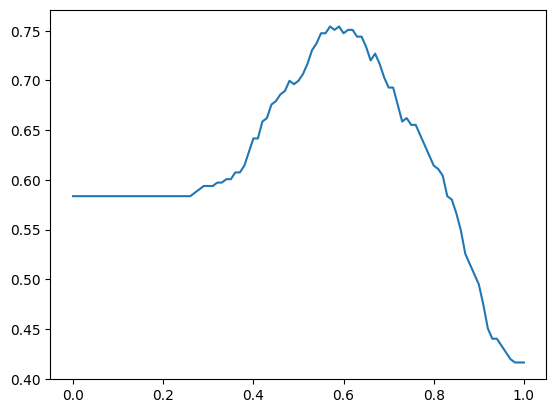

In [973]:
plt.plot(thresholds, scores)

# Manual Confusion Table

In [906]:
from collections import Counter

In [907]:
t = 0.5

In [908]:
Counter(y_pred >= 1.0)

Counter({np.True_: 245, np.False_: 48})

In [909]:
1 - y_val.mean()

np.float64(0.41638225255972694)

In [910]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [911]:
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [912]:
predict_positive[ :5]

array([ True, False,  True,  True,  True])

In [913]:
actual_positive [:5]

array([ True,  True,  True, False,  True])

In [914]:
predict_positive & actual_positive

array([ True, False,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True, False,  True,  True,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True, False, False,  True,
        True, False, False,  True, False,  True,  True, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True, False,

In [915]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [916]:
tp, tn

(np.int64(164), np.int64(41))

In [917]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [918]:
fp, fn

(np.int64(81), np.int64(7))

In [919]:
manual_confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
manual_confusion_matrix

array([[ 41,  81],
       [  7, 164]])

In [920]:
(manual_confusion_matrix/ manual_confusion_matrix.sum()).round(2)

array([[0.14, 0.28],
       [0.02, 0.56]])

In [921]:
Accuracy = (tp + tn) / (tp + tn + fp + fn)
Accuracy

np.float64(0.6996587030716723)

In [922]:
precision = tp / (tp + fp)
precision

np.float64(0.6693877551020408)

In [923]:
tp

np.int64(164)

In [924]:
tp + fp

np.int64(245)

In [925]:
recall = tp / (tp + fn)
recall

np.float64(0.9590643274853801)

In [926]:
tnr_calc = tn / (tn + fp)
tnr_calc

np.float64(0.3360655737704918)

In [927]:
tpr = tp / (tp + fn)
tpr

np.float64(0.9590643274853801)

In [928]:
fpr = fp / (fp + tn)
fpr

np.float64(0.6639344262295082)

In [929]:
thresholds = np.arange(0.0, 1.01, 0.01)
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    scores.append({'threshold': t, 'precision': precision, 'recall': recall})
    

In [930]:
df_scores = pd.DataFrame(scores)
df_scores

,threshold,precision,recall
0,0.00,0.583618,1.000000
1,0.01,0.669388,0.959064
2,0.02,0.669388,0.959064
3,0.03,0.669388,0.959064
4,0.04,0.669388,0.959064
...,...,...,...
96,0.96,0.669388,0.959064
97,0.97,0.669388,0.959064
98,0.98,0.669388,0.959064
99,0.99,0.669388,0.959064


<Axes: xlabel='threshold'>

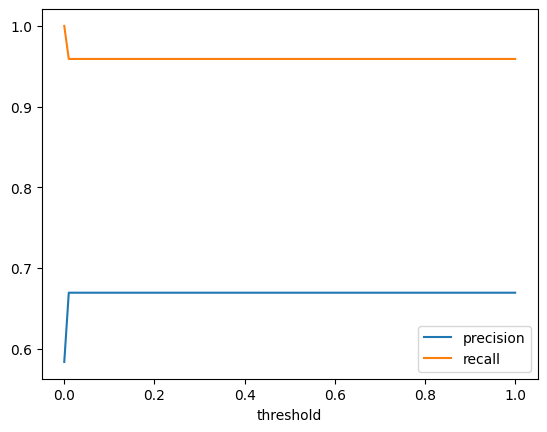

In [931]:
df_scores.plot(x='threshold', y=['precision', 'recall'])

In [932]:
# 4. Find the intersection point
df_scores['diff'] = np.abs(df_scores['precision'] - df_scores['recall'])
intersection_threshold = df_scores.iloc[df_scores['diff'].idxmin()]['threshold']

print(f"Calculated Intersection Threshold: {intersection_threshold:.3f}")

Calculated Intersection Threshold: 0.010


# Cross Validation

In [333]:
def train (df_train, y_train):
    dicts = df_train[categorical_cols + numerical_cols].to_dict(orient = 'records')

    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    return dv, model